<a href="https://colab.research.google.com/github/soumyajoykundu/TSA_Gold_Futures/blob/main/TSA_A2_Soumyajoy_Kundu_Python_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Analysis Assignment 02**
* Name: SOUMYAJOY KUNDU
* Roll Number: MDS202349



**$$\text{Gold Futures Price Analysis: Historical Insights and Future Forecasts}$$**


### Downloading the data
* Range of Data: Jan 2020 -- Dec 2023
* Source: Yahoo Finance

* Installing `yfinance` package to download financial data.

In [ ]:
# !pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Gold Futures (usually GC=F on Yahoo Finance)
ticker = 'GC=F'

# Download the data
# Specify the date range or interval (daily, weekly, monthly)
gold_data = yf.download(ticker, start="2000-01-01", end="2023-12-31", interval="1d")

[*********************100%***********************]  1 of 1 completed


* Saving the data as .csv file for future use.

In [ ]:
# Download the data to system as .csv file
gold_data.to_csv('gold_futures_data.csv')

# Load the .csv data
# gold_data = pd.read_csv('gold_futures_data.csv')

In [ ]:
gold_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2000-08-30 00:00:00+00:00,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31 00:00:00+00:00,278.299988,278.299988,278.299988,274.799988,274.799988,0
2000-09-01 00:00:00+00:00,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05 00:00:00+00:00,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06 00:00:00+00:00,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [ ]:
gold_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2023-12-22 00:00:00+00:00,2057.100098,2057.100098,2068.699951,2052.199951,2055.699951,202
2023-12-26 00:00:00+00:00,2058.199951,2058.199951,2060.800049,2054.199951,2060.000000,64
2023-12-27 00:00:00+00:00,2081.899902,2081.899902,2081.899902,2064.800049,2067.300049,586
2023-12-28 00:00:00+00:00,2073.899902,2073.899902,2087.300049,2066.500000,2081.600098,338
2023-12-29 00:00:00+00:00,2062.399902,2062.399902,2068.899902,2062.100098,2068.000000,47


### Data Overview

* Data : **Gold Futures** (`GC=F`)
* Time Range: `August 30, 2000`, to `December 29, 2023`
* Number of Entries: `5854`

Data Columns:
1. `(Adj Close, GC=F)`: Adjusted close prices
2. `(Close, GC=F)`: Close prices
3. `(High, GC=F)`: Highest prices
4. `(Low, GC=F)`: Lowest prices
5. `(Open, GC=F)`: Opening prices
6. `(Volume, GC=F)`: Trading volume

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5854 entries, 2000-08-30 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GC=F)  5854 non-null   float64
 1   (Close, GC=F)      5854 non-null   float64
 2   (High, GC=F)       5854 non-null   float64
 3   (Low, GC=F)        5854 non-null   float64
 4   (Open, GC=F)       5854 non-null   float64
 5   (Volume, GC=F)     5854 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 320.1 KB


### Why use `Close Price` in our study?

1. **Reflects Daily Market Sentiment**  
   - The Close Price captures the final consensus of the market, providing a reliable indicator of daily market trends.

2. **Foundation for Technical Analysis**  
   - Many key technical indicators (e.g., Moving Averages, RSI) rely on Close Prices to identify trends and generate trading signals.

3. **Minimizes Intraday Noise**  
   - By focusing on the Close Price, analysts can avoid intraday volatility and gain a clearer view of long-term trends.


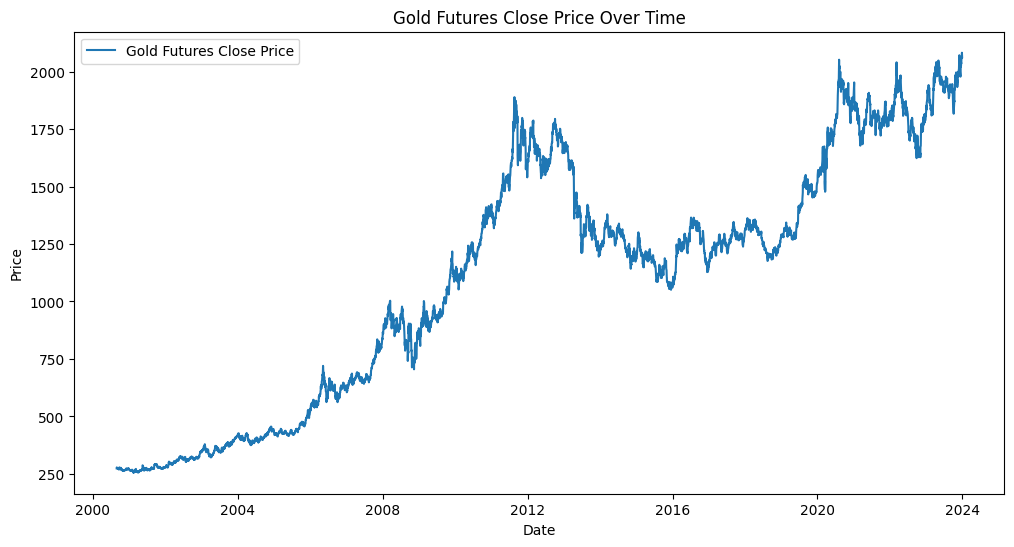

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Gold Futures Close Price')
plt.title('Gold Futures Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Applying log transformation
* **Stabilize Variance**
    * Log transformation helps stabilize heteroskedasticity (i.e., changing variance over time), making the series more stationary, which is a key assumption for many time series models.

* **Handle Exponential Growth**
    * Gold prices show exponential-like growth in the above plot. A log transformation will help linearize this trend, making it easier to model.

* **Ease of Interpretation**
    * Log-transformed prices represent percentage changes rather than absolute changes, which can be more intuitive in financial time series analysis.

In [ ]:
# Applying log transformation to the 'Close' column
gold_data['Log_Close'] = np.log(gold_data['Close'])

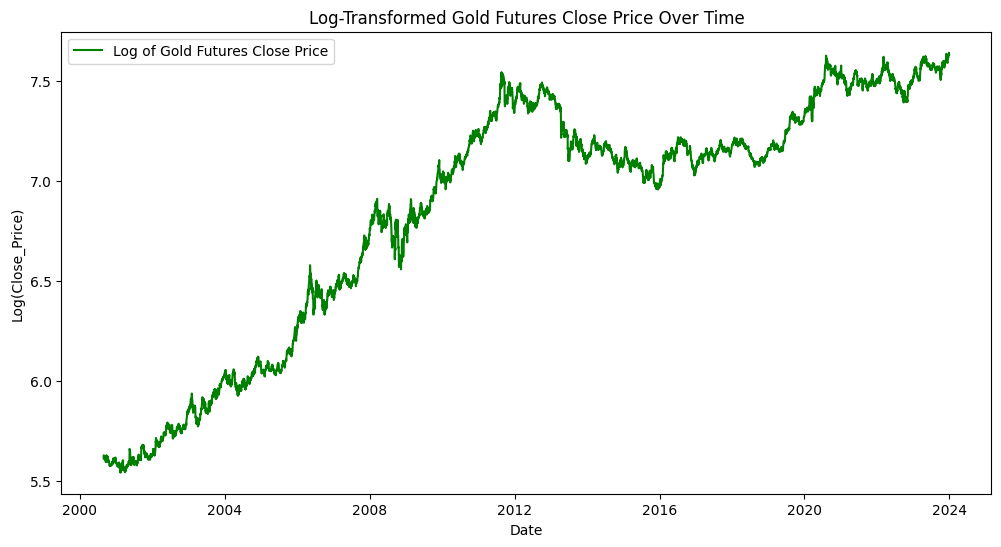

In [ ]:
import numpy as np

# Plotting the log-transformed series
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Log_Close'], label="Log of Gold Futures Close Price", color='green')
plt.title("Log-Transformed Gold Futures Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Log(Close_Price)")
plt.legend()
plt.show()

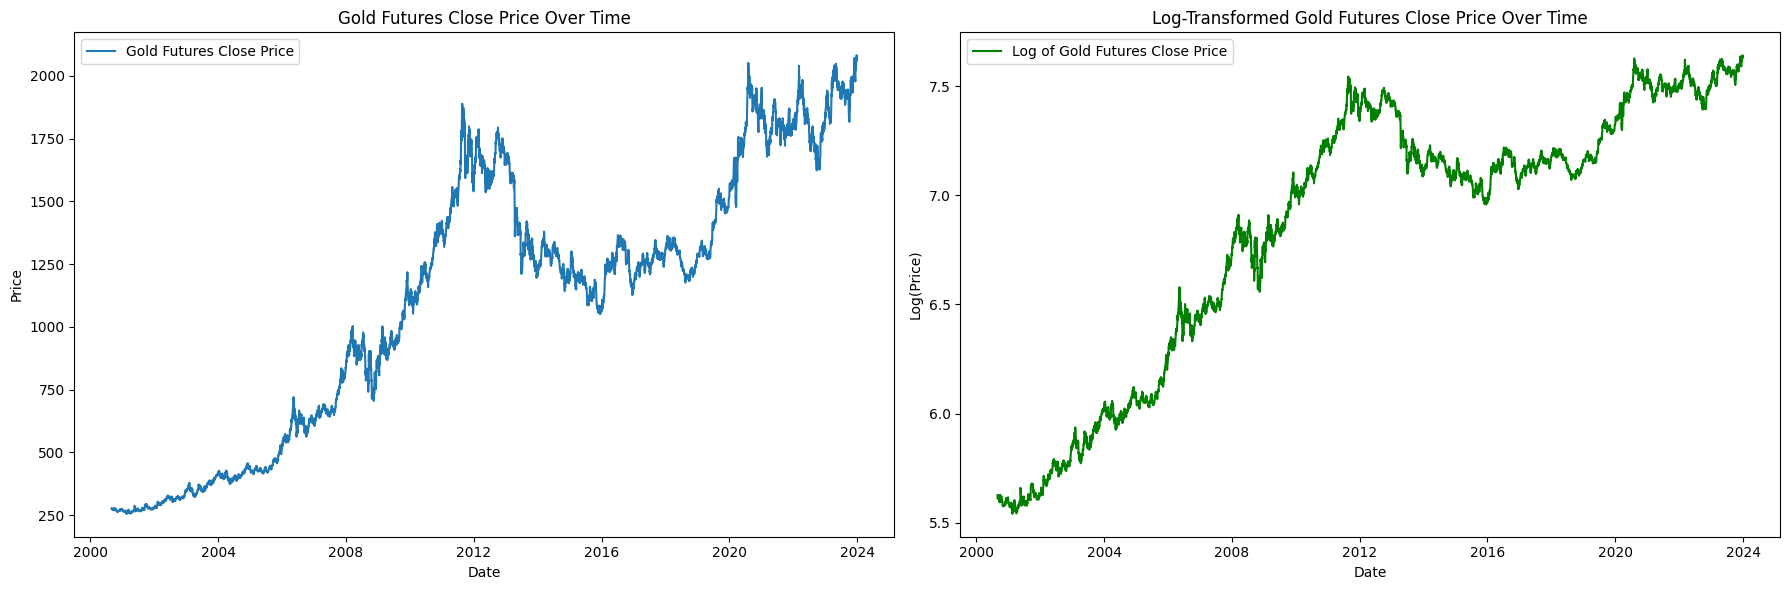

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Original series plot
axs[0].plot(gold_data['Close'], label='Gold Futures Close Price')
axs[0].set_title('Gold Futures Close Price Over Time')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].legend()
# axs[0].grid(True)

# Log-transformed series plot
axs[1].plot(gold_data['Log_Close'], label='Log of Gold Futures Close Price', color='green')
axs[1].set_title('Log-Transformed Gold Futures Close Price Over Time')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Log(Price)')
axs[1].legend()
# axs[1].grid(True)

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
log_data = gold_data['Log_Close']

### Seasonal Decomposition

<Figure size 1200x1200 with 0 Axes>

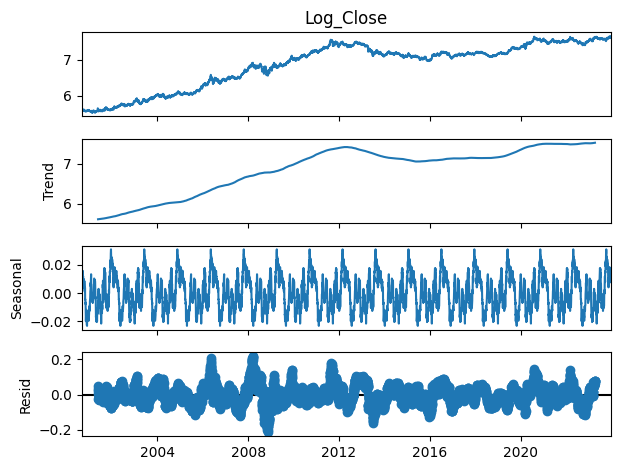

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(12, 12))

# Decompose the 'Close' series
decomposition = seasonal_decompose(log_data, model='additive', period=365)
decomposition.plot()
plt.show()

This plot represents the decomposition of the log-transformed Gold Futures Close Price time series into its components:

1. **Original Series (`Log_Close`)**:
  * This is the log-transformed Gold Futures Close Price data.
  * Shows an overall increasing trend with fluctuations over time.
2. **Trend**
  * The trend component captures the long-term upward movement in the log-transformed data.
  * It reflects the steady increase in gold prices over the years, particularly noticeable during periods of economic uncertainty or inflation.
3. **Seasonal**
  * The seasonal component displays repeating patterns within specific periods.
  * Even in log-transformed data, we see minor regular cycles which might correspond to economic or market-driven behaviors.
4. **Residual (Noise)**
  * The residuals are what remains after removing the trend and seasonality from the original data.
  * These values appear to show *heteroskedasticity* (variance increases over time), which may suggest periods of higher volatility in gold prices.

In [ ]:
# Perform ADF test on the residuals to check for stationarity
residuals = decomposition.resid.dropna()  # Ensure no NaN values in residuals

print('Stationarity of Residual Series\n')
check_adf_stationarity(residuals)

### ACF and PACF Plot

#### Original Log-Transformed Series

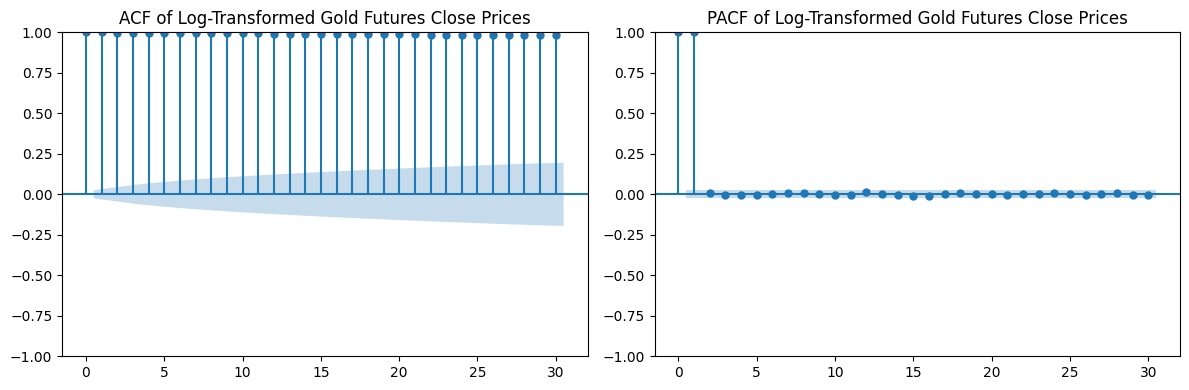

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming log_data is the log-transformed gold data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot ACF
plot_acf(log_data.dropna(), lags=30, ax=axes[0])
axes[0].set_title('ACF of Log-Transformed Gold Futures Close Prices')

# Plot PACF
plot_pacf(log_data.dropna(), lags=30, ax=axes[1], method='ywm')
axes[1].set_title('PACF of Log-Transformed Gold Futures Close Prices')

plt.tight_layout()
plt.show()

**ACF Plot**

* The Autocorrelation Function (ACF) shows significant positive lags at all levels, gradually tapering off, which indicates a strong persistence or trend in the data.
* The slow decay suggests that the series is non-stationary, even after log transformation.

**PACF Plot**

* The Partial Autocorrelation Function (PACF) shows a significant spike at lag 1 and becomes insignificant afterward.


The ACF and PACF plots strongly suggest that the series exhibits characteristics of a **Random Walk**.

**Random Walk Implications**
* A random walk is inherently non-stationary.
* The series' future values are largely unpredictable and depend heavily on the most recent observations.
* Differencing the data once (first-order differencing) often converts a random walk into a stationary series.

#### Differenced Log-Transformed Series

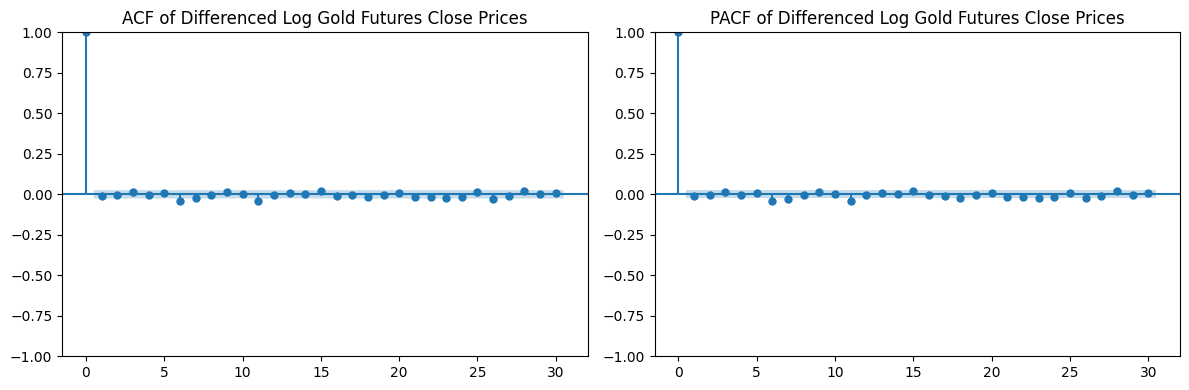

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming log_data is the log-transformed gold data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot ACF
plot_acf(log_data.diff().dropna(), lags=30, ax=axes[0])
axes[0].set_title('ACF of Differenced Log Gold Futures Close Prices')

# Plot PACF
plot_pacf(log_data.diff().dropna(), lags=30, ax=axes[1], method='ywm')
axes[1].set_title('PACF of Differenced Log Gold Futures Close Prices')

plt.tight_layout()
plt.show()

* After Differencing, all the coefficients are near zero within confidence intervals with no significant spikes for both ACF and PACF Plot.
* This suggsests that differencing the series makes it stationary after eliminating the random walk characteristic.

### Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
# ADF Test Function
def check_adf_stationarity(data):
    result = adfuller(data)
    print("Augmented Dickey-Fuller Test:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value:.4f}")
    if result[1] < 0.05:
        print("The series is stationary based on ADF test.")
    else:
        print("The series is non-stationary based on ADF test.")

In [ ]:
# KPSS Test Function
def check_kpss_stationarity(data):
    result = kpss(data, regression='c')  # 'c' assumes constant trend
    print("\nKPSS Test:")
    print(f"KPSS Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[3].items():
        print(f"Critical Value {key}: {value:.4f}")
    if result[1] < 0.05:
        print("The series is non-stationary based on KPSS test.")
    else:
        print("The series is stationary based on KPSS test.")

#### Original Log-Transformed Series

In [ ]:
check_adf_stationarity(log_data)

Augmented Dickey-Fuller Test:
ADF Statistic: -1.6281
p-value: 0.4685
Critical Value 1%: -3.4315
Critical Value 5%: -2.8620
Critical Value 10%: -2.5670
The series is non-stationary based on ADF test.


In [ ]:
check_kpss_stationarity(log_data)


KPSS Test:
KPSS Statistic: 10.5821
p-value: 0.0100
Critical Value 10%: 0.3470
Critical Value 5%: 0.4630
Critical Value 2.5%: 0.5740
Critical Value 1%: 0.7390
The series is non-stationary based on KPSS test.


<ipython-input-9-0650c93e25d1>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(data, regression='c')  # 'c' assumes constant trend


#### Differenced Log-Transformed Series

In [ ]:
check_adf_stationarity(log_data.diff().dropna())

Augmented Dickey-Fuller Test:
ADF Statistic: -24.5096
p-value: 0.0000
Critical Value 1%: -3.4315
Critical Value 5%: -2.8620
Critical Value 10%: -2.5670
The series is stationary based on ADF test.


In [ ]:
check_kpss_stationarity(log_data.diff().dropna())


KPSS Test:
KPSS Statistic: 0.1970
p-value: 0.1000
Critical Value 10%: 0.3470
Critical Value 5%: 0.4630
Critical Value 2.5%: 0.5740
Critical Value 1%: 0.7390
The series is stationary based on KPSS test.


<ipython-input-9-0650c93e25d1>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data, regression='c')  # 'c' assumes constant trend


* Both ADF and KPSS tests are concluded at 5% level of significance.
* The log-series of close price is non-stationary at level.
* After first differencing, stationary is achieved.

### Analysing Trends, Stability and Volatility

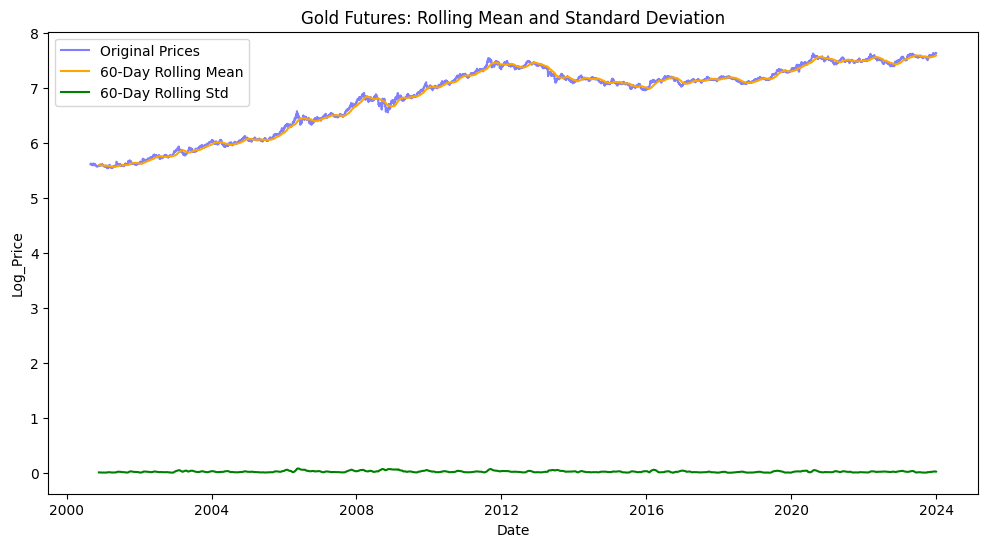

In [ ]:
window_size = 60
rolling_mean = log_data.rolling(window=window_size).mean()
rolling_std = log_data.rolling(window=window_size).std()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(log_data, label='Original Prices', color='blue', alpha=0.5)
plt.plot(rolling_mean, label=f'{window_size}-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label=f'{window_size}-Day Rolling Std', color='green')

plt.title('Gold Futures: Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Log_Price')
plt.legend()
# plt.grid(True)
plt.show()

* The log of close price of gold has been steadily increasing over the years, with
occasional fluctuations.
* The rolling mean closely follows the original prices, confirming
that it captures the broader trend
* The rolling standard deviation remains near zero,
indicating low volatility in the data during the observed period.

### Smoothing Techniques

#### Simple Moving Averages (SMA)

In [ ]:
log_data = log_data.to_frame(name='Log_Close') # Convert to DataFrame

# Calculate moving averages on log-transformed data
log_data['SMA_30'] = log_data['Log_Close'].rolling(window=30).mean()
log_data['SMA_180'] = log_data['Log_Close'].rolling(window=180).mean()
log_data['SMA_365'] = log_data['Log_Close'].rolling(window=365).mean()

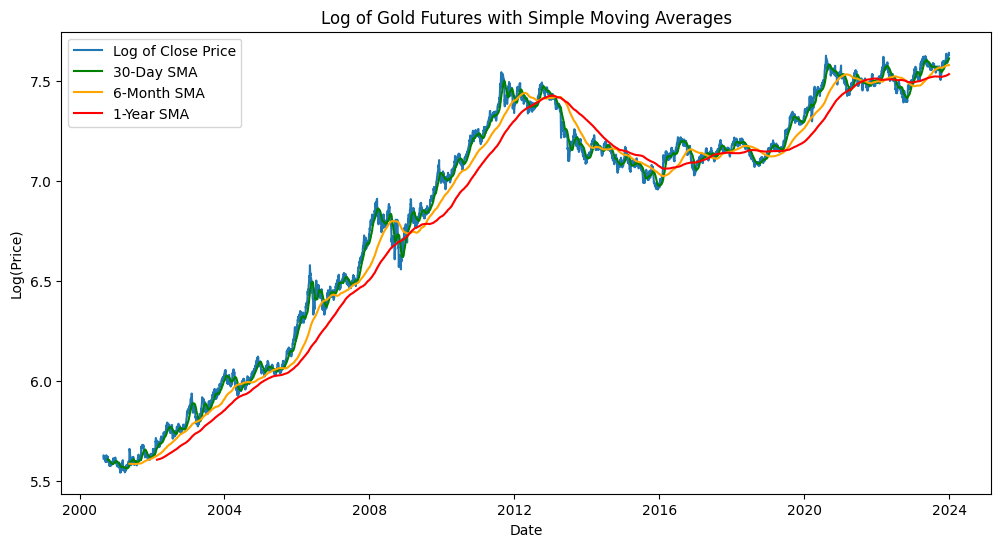

In [ ]:
# Plot smoothed data
plt.figure(figsize=(12, 6))
plt.plot(log_data['Log_Close'], label='Log of Close Price')
plt.plot(log_data['SMA_30'], label='30-Day SMA', color='green')
plt.plot(log_data['SMA_180'], label='6-Month SMA', color='orange')
plt.plot(log_data['SMA_365'], label='1-Year SMA', color='red')
plt.title('Log of Gold Futures with Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Log(Price)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define actual values
actual = log_data['Log_Close'].dropna()

# Define predictions (drop NaNs corresponding to each rolling window)
pred_sma_30 = log_data['SMA_30'].dropna()
pred_sma_180 = log_data['SMA_180'].dropna()
pred_sma_365 = log_data['SMA_365'].dropna()

# Align the actual values with predictions (same index)
actual_30 = actual.loc[pred_sma_30.index]
actual_180 = actual.loc[pred_sma_180.index]
actual_365 = actual.loc[pred_sma_365.index]

In [ ]:
# Calculate RMSE and MAE for each moving average
metrics = {}
for name, actual_vals, pred_vals in [
    ("30-Day SMA", actual_30, pred_sma_30),
    ("6-Month SMA", actual_180, pred_sma_180),
    ("1-Year SMA", actual_365, pred_sma_365)
]:
    rmse = np.sqrt(mean_squared_error(actual_vals, pred_vals))
    mae = mean_absolute_error(actual_vals, pred_vals)
    metrics[name] = {'RMSE': rmse, 'MAE': mae}

print("Evaluation: Log Scale\n")
# Print metrics
for sma, vals in metrics.items():
    print(f"{sma}: RMSE = {vals['RMSE']:.4f}, MAE = {vals['MAE']:.4f}")

Evaluation: Log Scale

30-Day SMA: RMSE = 0.0319, MAE = 0.0245
6-Month SMA: RMSE = 0.0775, MAE = 0.0608
1-Year SMA: RMSE = 0.1202, MAE = 0.0973


In [ ]:
print("Evaluation: Original Scale\n")

# Calculate RMSE and MAE for each moving average
metrics = {}
for name, actual_vals, pred_vals in [
    ("30-Day SMA", actual_30, pred_sma_30),
    ("6-Month SMA", actual_180, pred_sma_180),
    ("1-Year SMA", actual_365, pred_sma_365)
]:
    rmse = np.sqrt(mean_squared_error(np.exp(actual_vals), np.exp(pred_vals)))
    mae = mean_absolute_error(np.exp(actual_vals), np.exp(pred_vals))
    metrics[name] = {'RMSE': rmse, 'MAE': mae}

# Print metrics
for sma, vals in metrics.items():
    print(f"{sma}: RMSE = {vals['RMSE']:.4f}, MAE = {vals['MAE']:.4f}")

Evaluation: Original Scale

30-Day SMA: RMSE = 37.6338, MAE = 26.7197
6-Month SMA: RMSE = 90.3911, MAE = 66.7180
1-Year SMA: RMSE = 135.8793, MAE = 102.6771


#### Exponentially Weighted Moving Averages (EWMA)

In [ ]:
log_data['EWMA_30'] = log_data['Log_Close'].ewm(span=30, adjust=False).mean()
log_data['EWMA_180'] = log_data['Log_Close'].ewm(span=180, adjust=False).mean()
log_data['EWMA_365'] = log_data['Log_Close'].ewm(span=365, adjust=False).mean()

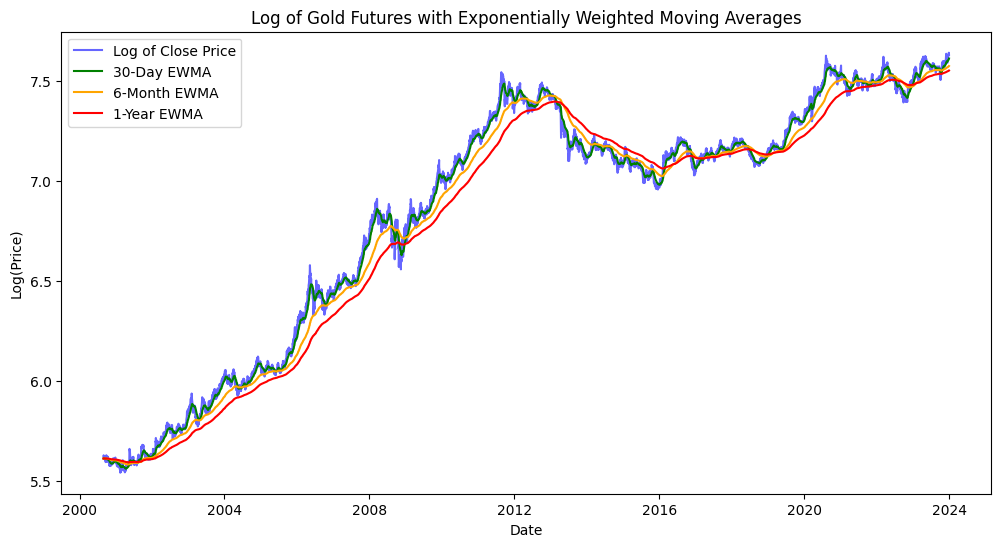

In [ ]:
# Plot the EWMAs along with the original log-transformed series
plt.figure(figsize=(12, 6))
plt.plot(log_data['Log_Close'], label='Log of Close Price', color='blue', alpha=0.6)
plt.plot(log_data['EWMA_30'], label='30-Day EWMA', color='green')
plt.plot(log_data['EWMA_180'], label='6-Month EWMA', color='orange')
plt.plot(log_data['EWMA_365'], label='1-Year EWMA', color='red')
plt.title('Log of Gold Futures with Exponentially Weighted Moving Averages')
plt.xlabel('Date')
plt.ylabel('Log(Price)')
plt.legend()
plt.show()

In [ ]:
# Define actual values
actual = log_data['Log_Close'].dropna()

print("Evaluation: Log Scale\n")
# Calculate RMSE and MAE for EWMA
ewma_metrics = {}
for name, ewma_col in [
    ("30-Day EWMA", 'EWMA_30'),
    ("6-Month EWMA", 'EWMA_180'),
    ("1-Year EWMA", 'EWMA_365')
]:
    pred = log_data[ewma_col].dropna()
    actual_aligned = actual.loc[pred.index]
    rmse = np.sqrt(mean_squared_error(actual_aligned, pred))
    mae = mean_absolute_error(actual_aligned, pred)
    ewma_metrics[name] = {'RMSE': rmse, 'MAE': mae}

# Print metrics for EWMAs
for ewma, vals in ewma_metrics.items():
    print(f"{ewma}: RMSE = {vals['RMSE']:.4f}, MAE = {vals['MAE']:.4f}")

Evaluation: Log Scale

30-Day EWMA: RMSE = 0.0270, MAE = 0.0206
6-Month EWMA: RMSE = 0.0683, MAE = 0.0532
1-Year EWMA: RMSE = 0.1083, MAE = 0.0879


In [ ]:
print("Evaluation: Original Scale\n")

# Calculate RMSE and MAE for EWMA
ewma_metrics = {}
for name, ewma_col in [
    ("30-Day EWMA", 'EWMA_30'),
    ("6-Month EWMA", 'EWMA_180'),
    ("1-Year EWMA", 'EWMA_365')
]:
    pred = log_data[ewma_col].dropna()
    actual_aligned = actual.loc[pred.index]
    rmse = np.sqrt(mean_squared_error(np.exp(actual_aligned), np.exp(pred)))
    mae = mean_absolute_error(np.exp(actual_aligned), np.exp(pred))
    ewma_metrics[name] = {'RMSE': rmse, 'MAE': mae}

# Print metrics for EWMAs
for ewma, vals in ewma_metrics.items():
    print(f"{ewma}: RMSE = {vals['RMSE']:.4f}, MAE = {vals['MAE']:.4f}")

Evaluation: Original Scale

30-Day EWMA: RMSE = 32.0001, MAE = 22.5712
6-Month EWMA: RMSE = 79.1904, MAE = 57.4606
1-Year EWMA: RMSE = 121.3855, MAE = 91.5208


##### 6-months Forecasting using EWMA-30Day

* Comparing the moving average models based on RMSE or MAE, clearly EWMA-30Day is the best with lowest values.
* Now, let's forecast with the best model so far for next 6 months.

In [ ]:
import pandas as pd
import numpy as np

# 6 months forecast horizon
forecast_horizon = 180

# Get the last known date and EWMA value from the log data
last_date = log_data.index[-1]
last_ewma_30 = log_data['EWMA_30'].iloc[-1]

# Generate forecasted dates
forecasted_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, freq='B')[1:]  # Business days only

# Create a DataFrame to hold the forecasted log values
forecasted_df = pd.DataFrame(index=forecasted_dates, columns=['Forecasted_EWMA_30'])

# Set the initial forecasted value (next period) to the last EWMA value
forecasted_df.iloc[0] = last_ewma_30

# Assuming the EWMA will remain constant for simplicity, propagate the value
forecasted_df['Forecasted_EWMA_30'].ffill(inplace=True)

<ipython-input-30-1ad64c28f066>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  forecasted_df['Forecasted_EWMA_30'].ffill(inplace=True)
<ipython-input-30-1ad64c28f066>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  forecasted_df['Forecasted_EWMA_30'].ffill(inplace=True)


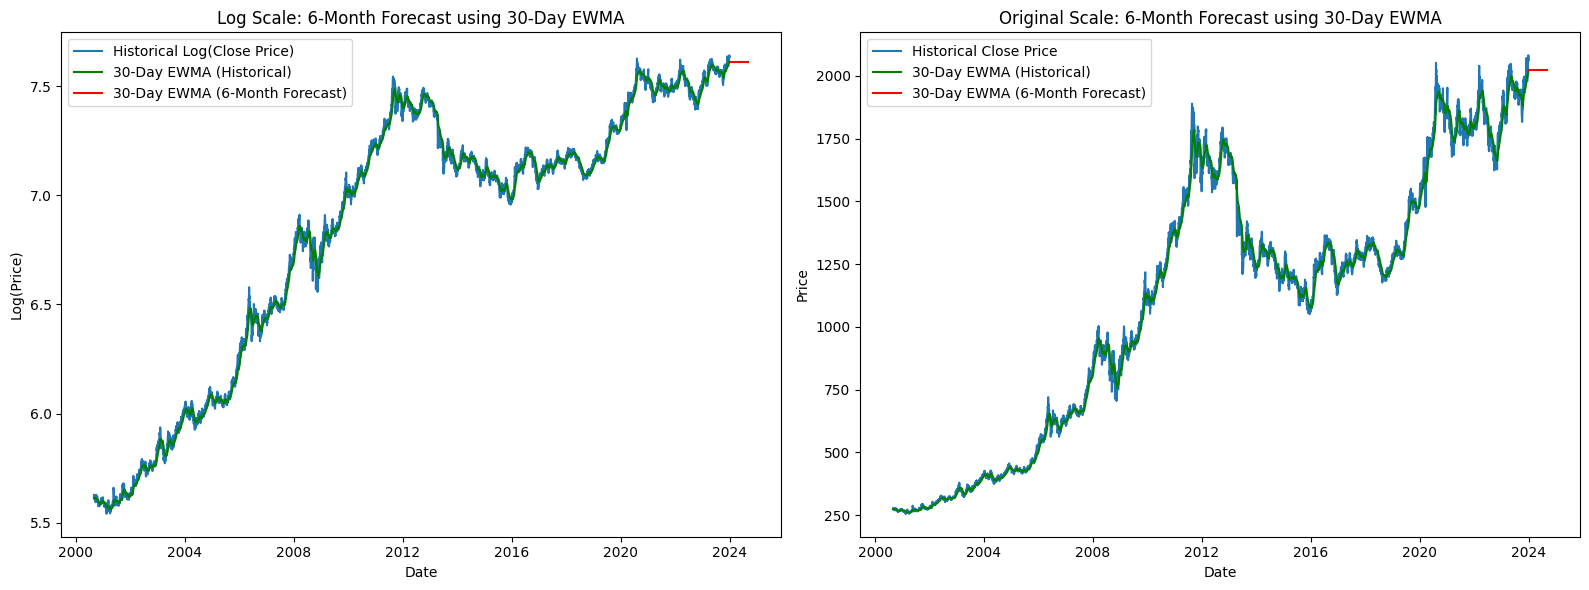

In [ ]:
# Convert the forecasted log prices back to original scale
forecasted_df['Forecasted_Original'] = np.exp(forecasted_df['Forecasted_EWMA_30'])

# Plot log-transformed scale and original scale forecasts side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Plot 1: Log-transformed forecast
axs[0].plot(log_data['Log_Close'], label='Historical Log(Close Price)')
axs[0].plot(log_data['EWMA_30'], label='30-Day EWMA (Historical)', color='green')
axs[0].plot(forecasted_df['Forecasted_EWMA_30'], label='30-Day EWMA (6-Month Forecast)', color='red')
axs[0].set_title('Log Scale: 6-Month Forecast using 30-Day EWMA')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Log(Price)')
axs[0].legend()

# Plot 2: Original scale forecast
original_prices = np.exp(log_data['Log_Close'])  # Convert historical data to original scale
axs[1].plot(log_data.index, original_prices, label='Historical Close Price')
axs[1].plot(log_data.index, np.exp(log_data['EWMA_30']), label='30-Day EWMA (Historical)', color='green')
axs[1].plot(forecasted_df.index, forecasted_df['Forecasted_Original'], label='30-Day EWMA (6-Month Forecast)', color='red')
axs[1].set_title('Original Scale: 6-Month Forecast using 30-Day EWMA')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

#### Holt-Winters Exponential Smoothing

##### Additive

In [ ]:
# Split the data into training and testing sets
train_data = log_data['Log_Close'][:-365]  # All but the last 12 months for training
test_data = log_data['Log_Close'][-365:]  # The last 12 months for testing

# Fit the Holt-Winters model to the training data
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_model = ExponentialSmoothing(train_data,
                                trend='add',
                                seasonal='add',
                                seasonal_periods=365,
                                initialization_method="estimated").fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
print(hw_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Log_Close   No. Observations:                 5489
Model:             ExponentialSmoothing   SSE                              0.628
Optimized:                         True   AIC                         -49079.283
Trend:                         Additive   BIC                         -46640.008
Seasonal:                      Additive   AICC                        -49025.340
Seasonal Periods:                   365   Date:                 Mon, 11 Nov 2024
Box-Cox:                          False   Time:                         05:35:04
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9998997                alpha                 True
smoothing_trend       

In [ ]:
# Forecast the next 365 days (12 months) using the trained model
forecast_test = hw_model.forecast(steps=365)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE - Log Scale
rmse = np.sqrt(mean_squared_error(test_data, forecast_test))
print(f"RMSE for the past 12 months forecast on log-scale: {rmse}")

# Calculate RMSE - Original Scale
rmse = np.sqrt(mean_squared_error(np.exp(test_data), np.exp(forecast_test)))
print(f"RMSE for the past 12 months forecast: {rmse}")

RMSE for the past 12 months forecast on log-scale: 0.08017868516582366
RMSE for the past 12 months forecast: 148.67200095509702


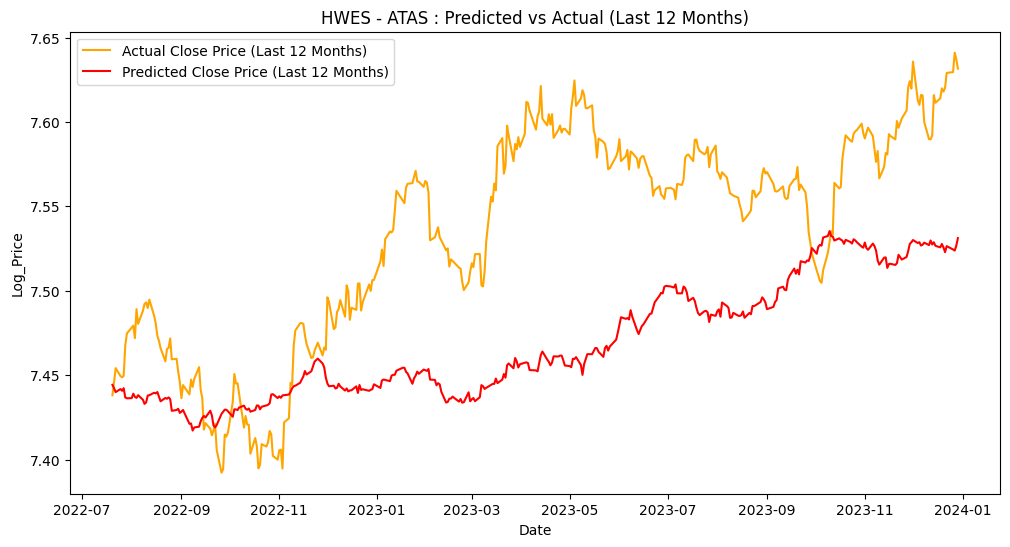

In [ ]:
forecast_test.index = gold_data.index[-365:]

# Plot the evaluation part: compare forecasted vs actual for the last 12 months
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Close Price (Last 12 Months)', color='orange')
plt.plot(forecast_test, label='Predicted Close Price (Last 12 Months)', color='red')
plt.title('HWES - ATAS : Predicted vs Actual (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Log_Price')
plt.legend()
plt.show()

##### Multiplicative

In [ ]:
# Split the data into training and testing sets (train on all data except the last 12 months)
train_data = log_data['Log_Close'][:-365]  # All but the last 365 days for training
test_data = log_data['Log_Close'][-365:]  # The last 365 days for testing

# Fit the Holt-Winters model to the training data
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_model = ExponentialSmoothing(train_data,
                                trend='mul',
                                seasonal='mul',
                                seasonal_periods=365,
                                initialization_method="estimated").fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
print(hw_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Log_Close   No. Observations:                 5489
Model:             ExponentialSmoothing   SSE                              0.651
Optimized:                         True   AIC                         -48877.232
Trend:                   Multiplicative   BIC                         -46437.957
Seasonal:                Multiplicative   AICC                        -48823.290
Seasonal Periods:                   365   Date:                 Mon, 11 Nov 2024
Box-Cox:                          False   Time:                         20:00:59
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9525993                alpha                 True
smoothing_trend       

In [ ]:
# Forecast the next 365 days (12 months) using the trained model
forecast_test = hw_model.forecast(steps=365)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Calculate accuracy (e.g., RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE - Log Scale
rmse = np.sqrt(mean_squared_error(test_data, forecast_test))
print(f"RMSE for the past 12 months forecast on log-scale: {rmse}")

# Calculate RMSE - Original Scale
rmse = np.sqrt(mean_squared_error(np.exp(test_data), np.exp(forecast_test)))
print(f"RMSE for the past 12 months forecast: {rmse}")

RMSE for the past 12 months forecast on log-scale: 0.07573238289780203
RMSE for the past 12 months forecast: 140.78865710683812


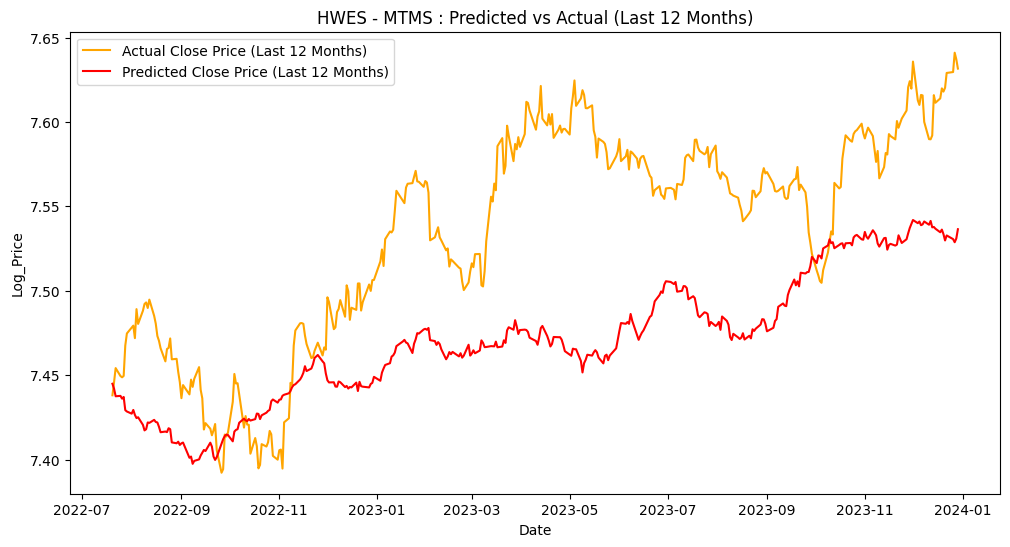

In [ ]:
forecast_test.index = gold_data.index[-365:]

# Plot the evaluation part: compare forecasted vs actual for the last 12 months
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Close Price (Last 12 Months)', color='orange')
plt.plot(forecast_test, label='Predicted Close Price (Last 12 Months)', color='red')
plt.title('HWES - MTMS : Predicted vs Actual (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Log_Price')
plt.legend()
plt.show()

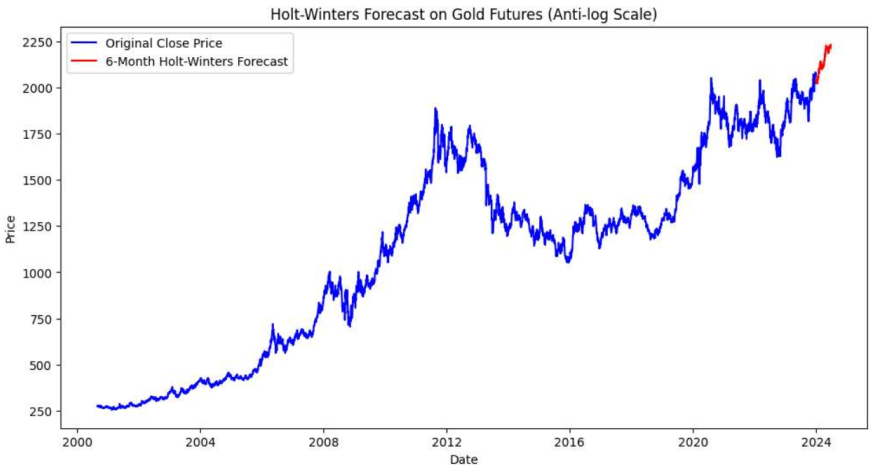

In [ ]:
# Now, forecast for the next 180 days (6 months)
forecast_periods = 180
forecast = hw_model.forecast(steps=forecast_periods)

# Convert the forecast from log scale to original scale using exp
forecast_anti_log = np.exp(forecast)
forecast_anti_log.index = pd.date_range(start=gold_data.index[-1], periods=forecast_periods)

# Plot original data and forecast (6 months ahead)
plt.figure(figsize=(8, 5))
plt.plot(gold_data['Close'], label='Original Close Price', color='blue')  # Original Close Price
plt.plot(forecast_anti_log, label='6-Month Holt-Winters Forecast', color='red')
plt.title('Holt-Winters Forecast on Gold Futures')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### ARIMA

In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

#### Grid Search - Finding Best Model

In [ ]:
# Define the range for p, d, and q
p = range(0, 3)  # AR parameter
d = range(0, 2)  # Differencing
q = range(0, 3)  # MA parameter

# Generate all combinations of p, d, q
pdq_combinations = list(itertools.product(p, d, q))


In [ ]:
# Store results
results = []
best_aic = float("inf")
best_order = None
best_model = None

# Iterate over all combinations of p, d, q
for order in pdq_combinations:
    try:
        # Fit the model
        model = ARIMA(log_data['Log_Close'].dropna(), order=order)
        arima_result = model.fit()

        # Save results
        results.append((order, arima_result.aic))

        # Check if this is the best model so far
        if arima_result.aic < best_aic:
            best_aic = arima_result.aic
            best_order = order
            best_model = arima_result

    except Exception as e:
        # Print or log error (e.g., if the model can't converge)
        print(f"Error with order {order}: {e}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Print the best result
print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")
print(best_model.summary())

Best ARIMA order: (0, 1, 0) with AIC: -36248.831839190665
                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                 5854
Model:                 ARIMA(0, 1, 0)   Log Likelihood               18125.416
Date:                Wed, 13 Nov 2024   AIC                         -36248.832
Time:                        12:04:05   BIC                         -36242.157
Sample:                             0   HQIC                        -36246.511
                               - 5854                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   1.15e-06    103.990      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):           

#### Fitting Best Model - ARIMA(0,1,0)

The mathematical model is given by,

$$(1-B)Y_t = \epsilon_t$$
or, $$Y_t = Y_{t-1} + ϵ_t$$

where, $ϵ_t \sim \mathcal{N}(0, σ^2)$ $\forall$ $t$

Basically, this is a **Random Walk** Model.

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Set test size to 12 months
test_size = 365
train_data, test_data = gold_data['Close'][:-test_size], gold_data['Close'][-test_size:]

# Log-transform the data
log_train_data = np.log(train_data)
log_test_data = np.log(test_data)

In [ ]:
# Fit ARIMA(0,1,0) on the log-transformed training data
model = ARIMA(log_train_data, order=(0, 1, 0))
arima_result = model.fit()

print(arima_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   GC=F   No. Observations:                 5489
Model:                 ARIMA(0, 1, 0)   Log Likelihood               16930.595
Date:                Wed, 13 Nov 2024   AIC                         -33859.189
Time:                        12:07:29   BIC                         -33852.579
Sample:                             0   HQIC                        -33856.884
                               - 5489                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   1.21e-06    100.940      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):              6919.56
Prob(Q):                              0.43   Pr

In [ ]:
# Forecast on the log-transformed test set (last 12 months)
start = len(log_train_data)
end = len(log_train_data) + test_size - 1
log_predictions = arima_result.predict(start=start, end=end, typ="levels")

# Convert the predictions back to the original scale
predictions = np.exp(log_predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
# Evaluate the model on the log scale
mae = mean_absolute_error(log_test_data, log_predictions)
rmse = np.sqrt(mean_squared_error(log_test_data, log_predictions))

print(f"Mean Absolute Error for Log Data (MAE): {mae}")
print(f"Root Mean Squared Error for Log Data(RMSE): {rmse}")

# Evaluate the model on the original scale
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

print(f"\nMean Absolute Error for Original Data (MAE): {mae}")
print(f"Root Mean Squared Error for Original Data(RMSE): {rmse}")

Mean Absolute Error for Log Data (MAE): 0.09624491423094717
Root Mean Squared Error for Log Data(RMSE): 0.10993782039693405

Mean Absolute Error for Original Data (MAE): 175.219450315711
Root Mean Squared Error for Original Data(RMSE): 201.5851755150657


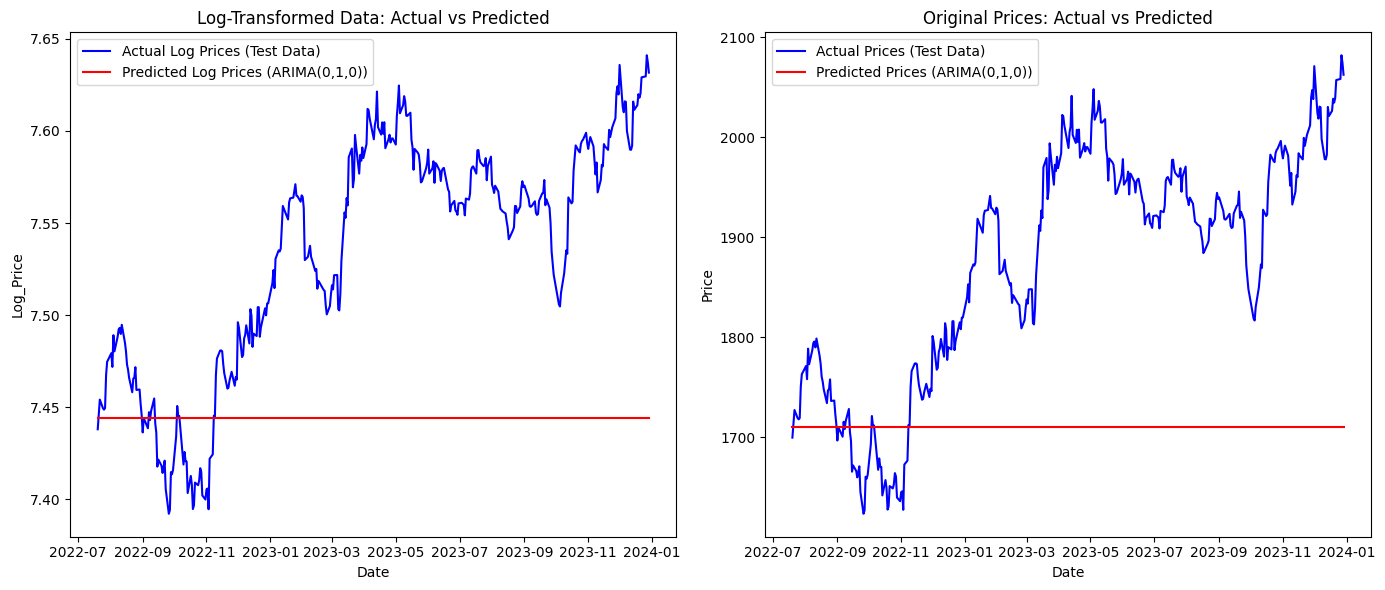

In [ ]:
# Plot both the log-transformed and original price comparisons side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for log-transformed data
axes[0].plot(test_data.index, log_test_data, label="Actual Log Prices (Test Data)", color="blue")
axes[0].plot(test_data.index, log_predictions, label="Predicted Log Prices (ARIMA(0,1,0))", color="red")
axes[0].set_title("Log-Transformed Data: Actual vs Predicted")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Log_Price")
axes[0].legend()

# Plot for original prices
axes[1].plot(test_data.index, test_data, label="Actual Prices (Test Data)", color="blue")
axes[1].plot(test_data.index, predictions, label="Predicted Prices (ARIMA(0,1,0))", color="red")
axes[1].set_title("Original Prices: Actual vs Predicted")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price")
axes[1].legend()

plt.tight_layout()
plt.show()


* The predictions are flat, as it copies the previous value while predicting the next value.
* The model is overly simplistic which results to underfitting and a very low AIC.

#### Residual Analysis

Text(0.5, 1.0, 'ARIMA(0,1,0) : Residual Plot')

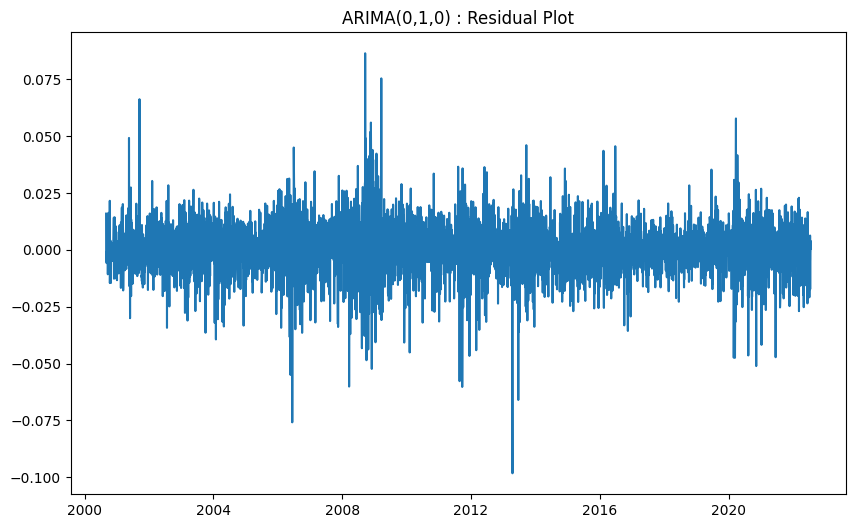

In [ ]:
residuals = arima_result.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals[1:]) # First obs is same as train data as it is random walk model
plt.title('ARIMA(0,1,0) : Residual Plot')

1. **Test for Normality: Jarque-Bera Test**
    * The Jarque-Bera test checks if the residuals are normally distributed. A low p-value (less than 0.05) indicates that the residuals do not follow a normal distribution. Here, the p-value is 0.00, so the residuals are significantly non-normal.
    * This is a concern for our model, as the assumption of normality does not hold.

2. **Test for Autocorrelation: Ljung-Box Test**
  * The Ljung-Box test assesses if there are significant autocorrelations in the residuals.
  * A high p-value (greater than 0.05) indicates that there is no significant autocorrelation, meaning the residuals are uncorrelated. In this case, the p-value is 0.43, so there's no evidence of autocorrelation, which is a good sign for model adequacy.

3. **Test for Homoscedasticity: Breush Pagan Godfrey Test**
    * This test checks if there is heteroskedasticity (non-constant variance) in the residuals. A p-value less than 0.05 suggests heteroskedasticity is present.

##### Jarque - Bera Test

In [ ]:
from scipy.stats import jarque_bera

# Assuming you have a series of data called `log_returns` (or any dataset you want to test)
# Replace 'log_returns' with your actual data variable
test_statistic, p_value = jarque_bera(residuals[1:])

print("Jarque-Bera Test Results:")
print(f"Test Statistic: {test_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
if p_value < 0.05:
    print("The null hypothesis of normality is rejected at the 5% significance level.")
else:
    print("The null hypothesis of normality cannot be rejected.")

Jarque-Bera Test Results:
Test Statistic: 6919.5640
P-value: 0.0000
The null hypothesis of normality is rejected at the 5% significance level.


##### Ljung - Box Test

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test
lb_test = acorr_ljungbox(residuals[1:], lags=[10, 20, 30], return_df=True)
print(lb_test)

      lb_stat  lb_pvalue
10  18.048637   0.054149
20  34.522225   0.022802
30  51.799561   0.008004


##### Breush - Pagan - Godfrey Test

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Get fitted values from the model
fitted_values = arima_result.fittedvalues[1:]  # Exclude the first NA value
residuals = residuals[1:]  # Exclude the first NA value

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, sm.add_constant(fitted_values))
bp_stat, bp_pvalue = bp_test[0], bp_test[1]
print(f"Breusch-Pagan Test Statistic: {bp_stat:.4f}, p-value: {bp_pvalue:.4f}")
# Homo

Breusch-Pagan Test Statistic: 1.8055, p-value: 0.1790


The Residuals are **Non - Normal White Noise**.
1. Normality $\times$
2. No Autocorrelation $\checkmark$
3. Homoscedasticity $\checkmark$

<Figure size 800x600 with 0 Axes>

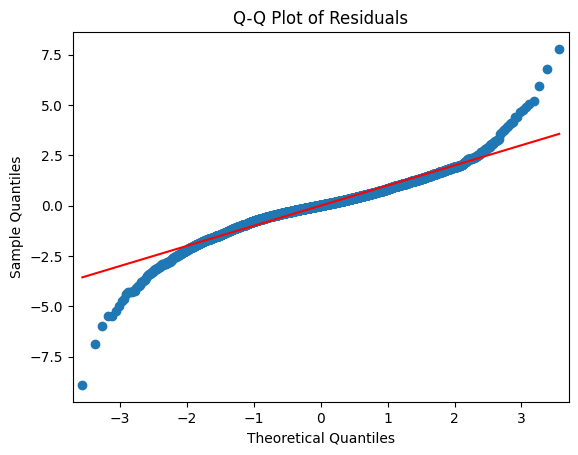

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals[1:], line='s', fit=True)
plt.title('Q-Q Plot of Residuals')
# plt.grid(True)
plt.show()

* Deviation in Tails:

    * The points deviate significantly from the red line at both extremes, indicating heavy tails (potential skewness or kurtosis).
    * This suggests that the residuals have more extreme values than expected under a normal distribution (possibly fat tails).

* Good Fit Near Center:

    * In the middle range, the points closely align with the red line, indicating that the central portion of the distribution is approximately normal.

* Heavy Right Tail and Left Tail:

    * The residuals at the far right and far left deviate significantly upwards and downwards, respectively, indicating outliers or extreme events in both directions.

This Q-Q plot coincides with the non-normality inference obtained by Jarque-Bera Test.

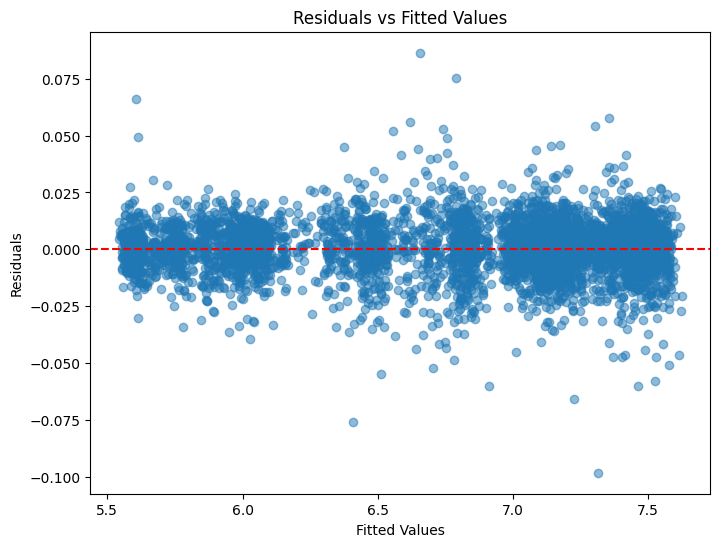

In [ ]:
fitted_values = arima_result.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values[1:], residuals[1:], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
# plt.grid(True)
plt.show()


* Centered Around Zero:

    * The residuals are generally centered around the red dashed line at zero, which is a good sign. This indicates that the model's predictions are, on average, unbiased.
* No Apparent Trend:

    * There is no systematic pattern (e.g., increasing or decreasing trend) in the residuals. This suggests that the model captures the linear relationship in the data reasonably well.
* Heteroscedasticity (Variance Pattern):

    * The spread of residuals appears relatively consistent across fitted values, although there is a slightly larger spread in the mid-range (around 6.5 to 7).

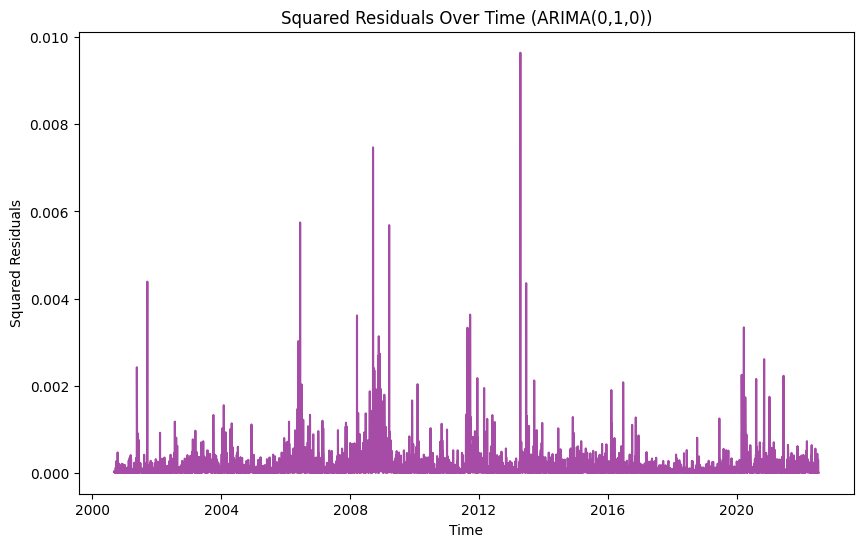

In [ ]:
# Square the residuals and plot
squared_residuals = residuals[1:]**2

# Plot the squared residuals
plt.figure(figsize=(10, 6))
plt.plot(squared_residuals, color='purple', alpha=0.7)
plt.title('Squared Residuals Over Time (ARIMA(0,1,0))')
plt.xlabel('Time')
plt.ylabel('Squared Residuals')
plt.show()

* Volatility Clustering
  * Squaring the residuals helps identify periods of high and low variance (volatility).
  * Peaks in the squared residuals plot might indicates periods of increased uncertainty or shocks in the gold futures market.

Squared residuals exhibited patterns or clusters, it indicates heteroscedasticity (time-varying volatility). Let's fit a GARCH model to better capture the volatility dynamics.

### GARCH

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 12.9 MB/s eta 0:00:00


In [ ]:
# Calculate log returns
gold_data['Log_Returns'] = gold_data['Log_Close'].diff().dropna()

In [ ]:
# Check for empty returns data and handle it
log_returns_data = gold_data['Log_Returns'].dropna()
if log_returns_data.empty:
    raise ValueError("Log returns data is empty. Check for consecutive missing values in 'Close' column.")

#### Grid Search - Finding Optimal Model

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from arch import arch_model # Import arch_model


# Hyperparameter tuning (grid search for GARCH(p, q))
best_aic = np.inf
best_p = 0
best_q = 0
for p in range(1, 6):  # Test different p values
    for q in range(1, 6):  # Test different q values
        model = arch_model(log_returns_data, vol='Garch', p=p, q=q)
        result = model.fit(disp="off")

        # Check if this model has the lowest AIC
        if result.aic < best_aic:
            best_aic = result.aic
            best_p = p
            best_q = q

# Print the best p and q
print(f"Best p: {best_p}, Best q: {best_q}, AIC: {best_aic}")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001195. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001195. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarn

Best p: 1, Best q: 2, AIC: -37091.35091085693


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001195. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
print(f"Best p: {best_p}, Best q: {best_q}, AIC: {best_aic}")

Best p: 1, Best q: 2, AIC: -37091.35091085693


The mathematical form of the optimal model is GARCH(1,2),

$$Y_t = \mu + \epsilon_t$$
$$\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2$$

In [ ]:
from arch import arch_model

# Fit a GARCH(1, 1) model
model = arch_model(log_returns_data, vol='Garch', p=1, q=2)
garch_result = model.fit()

# Print the model summary
print(garch_result.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3.295091669223306e+20
Iteration:      2,   Func. Count:     20,   Neg. LLF: -18550.675442661875
Optimization terminated successfully    (Exit mode 0)
            Current function value: -18550.675455428463
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                18550.7
Distribution:                  Normal   AIC:                          -37091.4
Method:            Maximum Likelihood   BIC:                          -37058.0
                                        No. Observations:                 5853
Date:                Tue, Nov 12 2024   Df Residuals:                     5852
Time:    

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001195. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


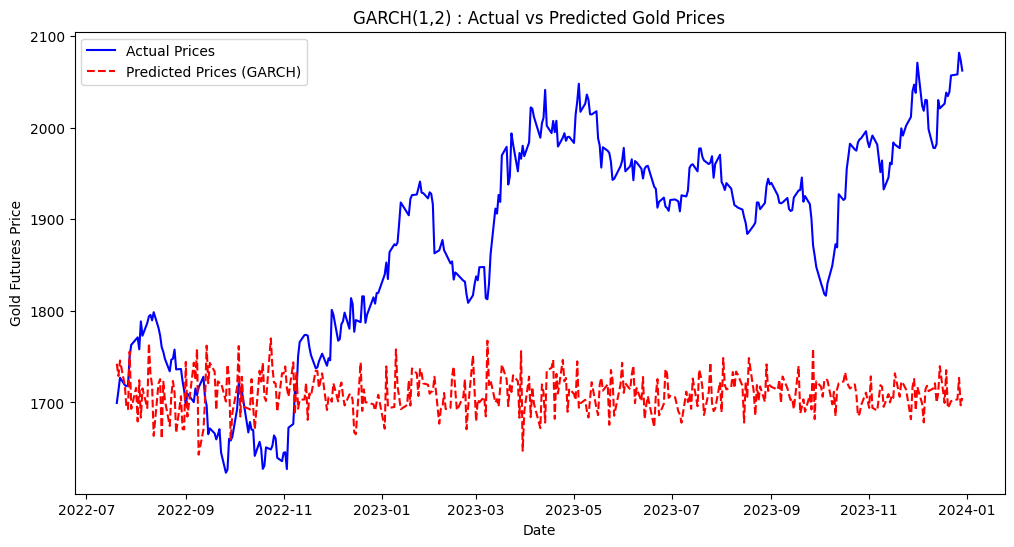

In [ ]:
# Plot Actual vs Predicted Prices on the Test Set
plt.figure(figsize=(12, 6))
plt.plot(gold_data.index[train_size:], actual_prices_test, label='Actual Prices', color='blue')
plt.plot(gold_data.index[train_size:], predicted_prices_test, label='Predicted Prices (GARCH)', color='red', linestyle='dashed')
plt.title('GARCH(1,2) : Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Futures Price')
plt.legend()
# plt.grid(True)
plt.show()

* Alone GARCH cannot model the trend or other patterns in the data.
* GARCH only models the volatility in the data.
* We have to integrate a model that takes into account the mean component as well like the ARIMA here.

### ARIMA - GARCH

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Step 1: Fit ARIMA model to capture trend
train_size = len(gold_data) - 365
train_data = log_data['Log_Close'][:-365]
test_data = log_data['Log_Close'][-365:]

# Fit ARIMA model
arima_order = (0, 1, 0)
arima_model = ARIMA(train_data, order=arima_order)
arima_result = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Step 2: Fit GARCH model on ARIMA residuals to capture volatility
residuals = arima_result.resid
garch_model = arch_model(residuals.dropna(), vol='Garch', p=1, q=2)
garch_result = garch_model.fit(disp="off")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00586. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Step 3: Forecast with ARIMA + GARCH
forecast_horizon = len(test_data)
arima_forecast = arima_result.forecast(steps=forecast_horizon)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Generate GARCH forecast for residual volatility
garch_forecast = garch_result.forecast(horizon=forecast_horizon)
predicted_volatility = garch_forecast.variance.values[-1, :]

# Combine ARIMA forecast with GARCH volatility
predicted_prices = arima_forecast + np.sqrt(predicted_volatility)

In [ ]:
# Calculate RMSE and MAE on log scale
rmse = np.sqrt(mean_squared_error(test_data, predicted_prices))
mae = mean_absolute_error(test_data,predicted_prices)
print("Evaluation: Log Scale\n")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Evaluation: Log Scale

RMSE: 0.06563654274424183
MAE: 0.05819007022887846


In [ ]:
# Calculate RMSE and MAE on original scale
rmse = np.sqrt(mean_squared_error(np.exp(test_data), np.exp(predicted_prices)))
mae = mean_absolute_error(np.exp(test_data), np.exp(predicted_prices))
print("Evaluation: Original Scale\n")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Evaluation: Original Scale

RMSE: 121.92237436976478
MAE: 108.1109837494885


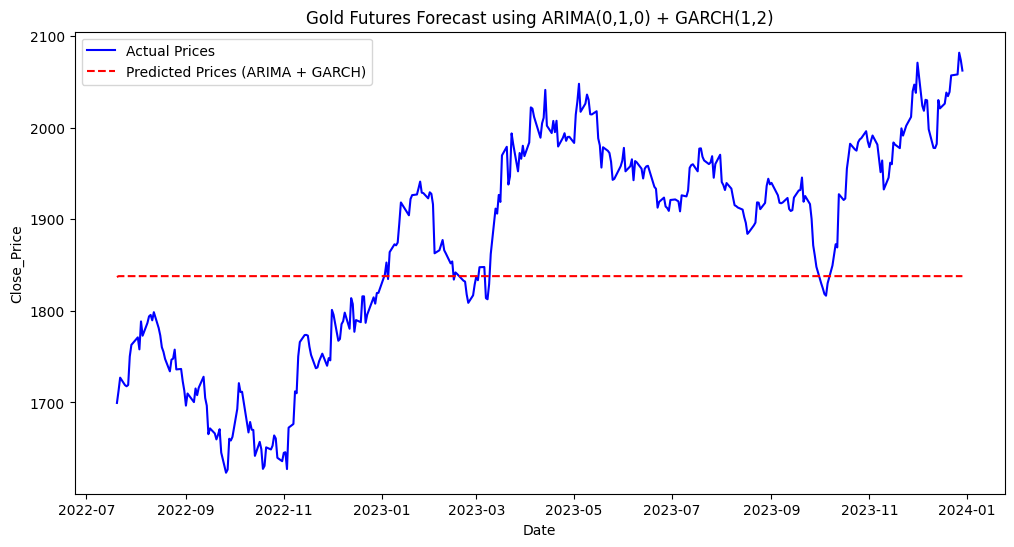

In [ ]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(gold_data.index[-365:], np.exp(test_data), label='Actual Prices', color='blue')
plt.plot(gold_data.index[-365:], np.exp(predicted_prices), label='Predicted Prices (ARIMA + GARCH)', color='red', linestyle='dashed')
plt.title('Gold Futures Forecast using ARIMA(0,1,0) + GARCH(1,2)')
plt.xlabel('Date')
plt.ylabel('Close_Price')
plt.legend()
# plt.grid(True)
plt.show()


* The model is not working well as the predictions are flat.
* So, residual analysis is not required.


### LSTM Network

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback
import math

In [ ]:
# Scale the 'Close' prices to range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(gold_data['Close'].values.reshape(-1, 1))

# Initial train-test split: 80% training, 20% testing
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Further split the training data: 80% training, 20% validation
validation_split = 0.2
val_split_index = int(len(train_data) * (1 - validation_split))
actual_train_data = train_data[:val_split_index]
val_data = train_data[val_split_index:]

# Function to create sequences of data
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Sequence length (e.g., past 60 days used for prediction)
sequence_length = 60

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences(actual_train_data, sequence_length)
X_val, y_val = create_sequences(val_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape to fit LSTM input (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

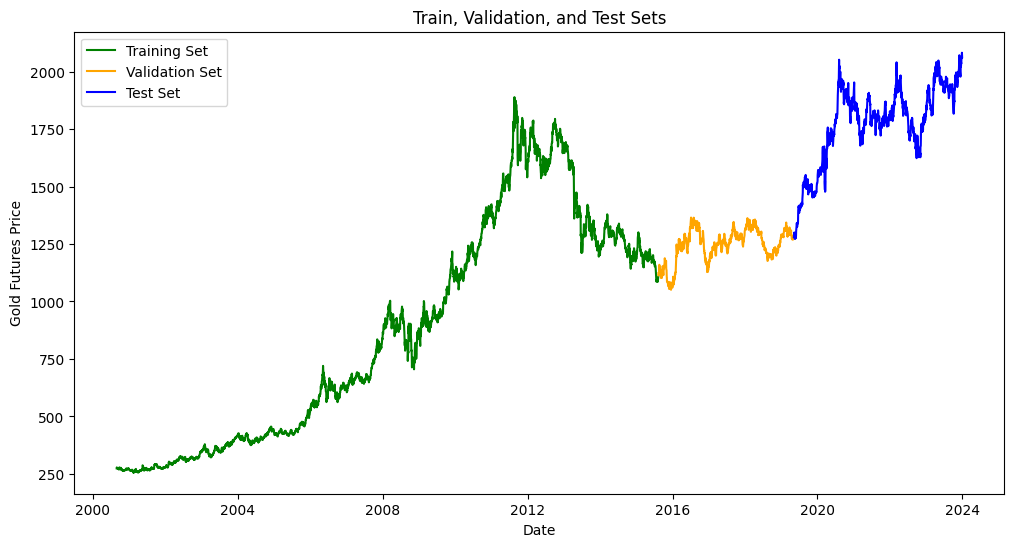

In [ ]:
# Get the dates for each split
train_dates = gold_data.index[:val_split_index]  # Training set
val_dates = gold_data.index[val_split_index:train_size]  # Validation set
test_dates = gold_data.index[train_size:]  # Test set

# Scale back the data to original values for plotting
train_actual = scaler.inverse_transform(train_data[:val_split_index])
val_actual = scaler.inverse_transform(train_data[val_split_index:])
test_actual = scaler.inverse_transform(test_data)

# Plotting the data
plt.figure(figsize=(12, 6))

# Training set in green
plt.plot(train_dates, train_actual, color='green', label='Training Set')

# Validation set in orange
plt.plot(val_dates, val_actual, color='orange', label='Validation Set')

# Test set in blue
plt.plot(test_dates, test_actual, color='blue', label='Test Set')

plt.title('Train, Validation, and Test Sets')
plt.xlabel('Date')
plt.ylabel('Gold Futures Price')
plt.legend()
plt.show()

In [ ]:
train_dates, val_dates, test_dates

(DatetimeIndex(['2000-08-30 00:00:00+00:00', '2000-08-31 00:00:00+00:00',
                '2000-09-01 00:00:00+00:00', '2000-09-05 00:00:00+00:00',
                '2000-09-06 00:00:00+00:00', '2000-09-07 00:00:00+00:00',
                '2000-09-08 00:00:00+00:00', '2000-09-11 00:00:00+00:00',
                '2000-09-12 00:00:00+00:00', '2000-09-13 00:00:00+00:00',
                ...
                '2015-07-29 00:00:00+00:00', '2015-07-30 00:00:00+00:00',
                '2015-07-31 00:00:00+00:00', '2015-08-03 00:00:00+00:00',
                '2015-08-04 00:00:00+00:00', '2015-08-05 00:00:00+00:00',
                '2015-08-06 00:00:00+00:00', '2015-08-07 00:00:00+00:00',
                '2015-08-10 00:00:00+00:00', '2015-08-11 00:00:00+00:00'],
               dtype='datetime64[ns, UTC]', name='Date', length=3746, freq=None),
 DatetimeIndex(['2015-08-12 00:00:00+00:00', '2015-08-13 00:00:00+00:00',
                '2015-08-14 00:00:00+00:00', '2015-08-17 00:00:00+00:00',
         

In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model, validate on validation set
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[TqdmCallback(verbose=1)]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - loss: 0.0250 - val_loss: 2.6747e-04
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 2.3809e-04 - val_loss: 1.5236e-04
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 2.2549e-04 - val_loss: 1.5039e-04
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 2.3574e-04 - val_loss: 1.3762e-04
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 2.0848e-04 - val_loss: 1.7005e-04
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 1.9494e-04 - val_loss: 1.2623e-04
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 1.9994e-04 - val_loss: 1.2070e-04
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 1.8279e-04 - val_loss: 1.3825e-04
Epoch 9/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 1.6573e-04 - val_loss: 1.5880e-04
Epoch 10/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 1.6930e-04 - val_loss: 1.3096e-04
Epoch 11/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 60m

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

None


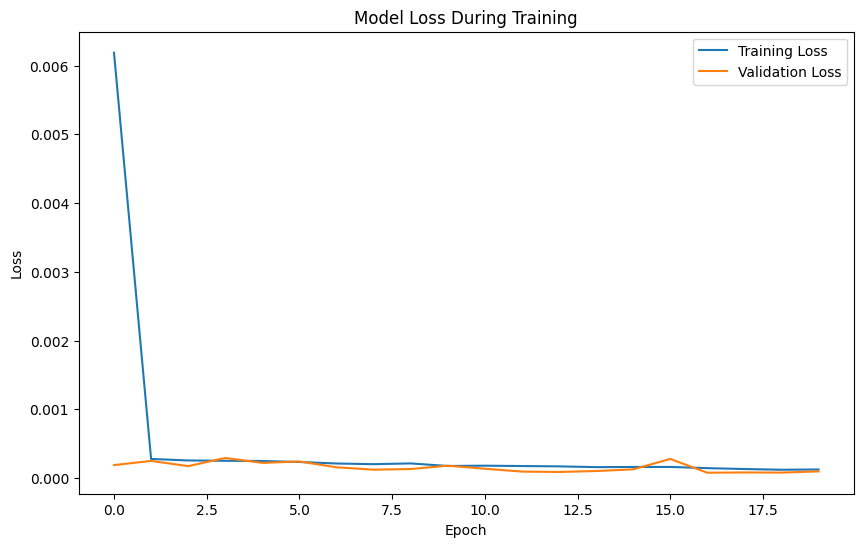

In [ ]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print("Evaluation : Original Scale")
# Calculate RMSE and MAE
rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

Evaluation : Original Scale
RMSE: 26.3986
MAE: 19.2120


In [ ]:
print("Evaluation : Log Scale")
# Calculate RMSE and MAE
rmse = math.sqrt(mean_squared_error(np.log(y_test_actual), np.log(predictions)))
mae = mean_absolute_error(np.log(y_test_actual), np.log(predictions))
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

Evaluation : Log Scale
RMSE: 0.0150
MAE: 0.0108


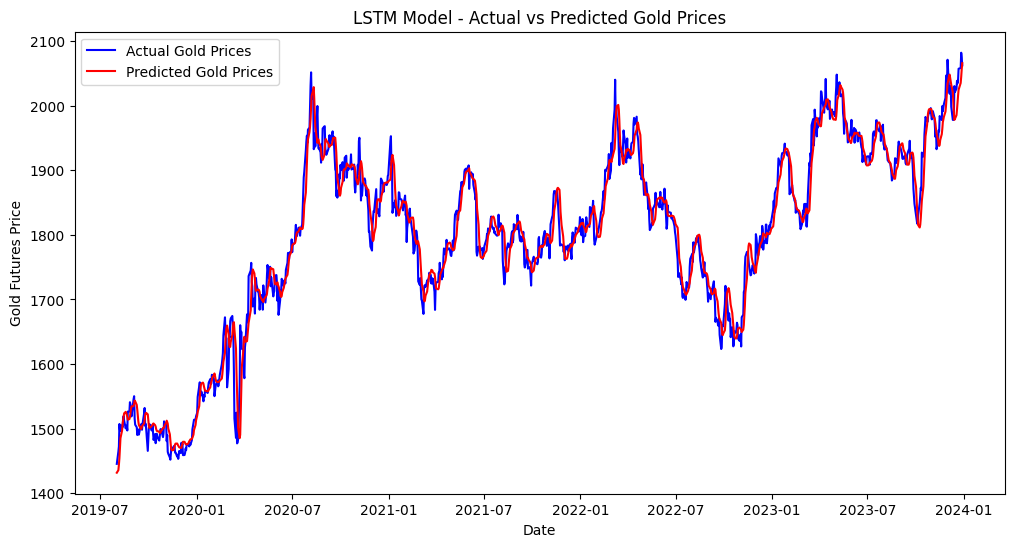

In [ ]:
# Get test set dates for plotting
test_dates = gold_data.index[train_size + sequence_length:]

# Plot actual vs predicted gold prices
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_actual, color='blue', label='Actual Gold Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Gold Prices')
plt.title('LSTM Model - Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Futures Price')
plt.legend()
plt.show()

In [ ]:
time_step = 60
# Number of future days to forecast (6 months ~ 180 days)
forecast_horizon = 180

# Prepare the input using the last `time_step` days (from the training data)
last_data = scaled_data[-time_step:]
forecast_input = last_data.reshape(1, time_step, 1)

# Create an array to store the forecasted prices
forecast_prices = []

# Make predictions for each day in the forecast horizon
for i in range(forecast_horizon):
    predicted_price = model.predict(forecast_input)
    forecast_prices.append(predicted_price[0, 0])

    # Update the input for the next prediction
    forecast_input = np.append(forecast_input[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━

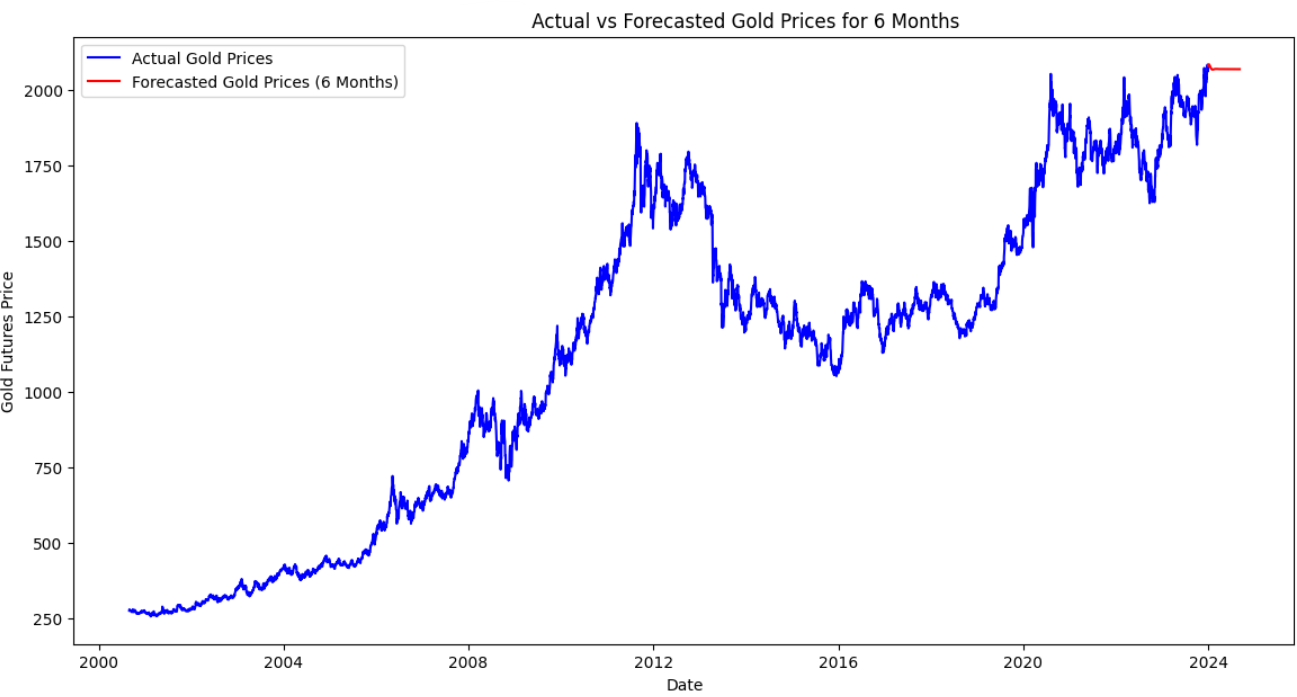

In [ ]:
# Inverse transform the forecasted values to get actual prices
forecast_prices = scaler.inverse_transform(np.array(forecast_prices).reshape(-1, 1))

# Create future dates for plotting (next 180 days)
future_dates = pd.date_range(start=gold_data.index[-1], periods=forecast_horizon + 1, freq='B')[1:]

# Plot the actual data and forecasted prices
plt.figure(figsize=(14, 7))
plt.plot(gold_data.index, scaler.inverse_transform(scaled_data), color="blue", label="Actual Gold Prices")
plt.plot(future_dates, forecast_prices, color="red", label="Forecasted Gold Prices (6 Months)")
plt.title("Actual vs Forecasted Gold Prices for 6 Months")
plt.xlabel("Date")
plt.ylabel("Gold Futures Price")
plt.legend()
plt.show()